# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv("data/heart_train.csv")

df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
1,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
2,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
3,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
4,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
268,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
269,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
270,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1


In [3]:
df_train['age_40'] = (df_train.age < 40).astype(int)
df_train['age_50'] = ((df_train.age >= 40) & (df_train.age < 50)).astype(int)
df_train['age_60'] = ((df_train.age >= 50) & (df_train.age < 60)).astype(int)
df_train['age_70'] = ((df_train.age >= 60) & (df_train.age < 70)).astype(int)


df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_40,age_50,age_60,age_70
0,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0,0,1,0,0
1,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1,0,1,0,0
2,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0,0,1,0
3,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1,1,0,0,0
4,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0,0,1,0,0
268,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,0,0,1,0
269,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1,0,0,1,0
270,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1,0,1,0,0


In [4]:
target = 'target'

cat_features_ = ["sex", "cp", "restecg", "exang", "slope", "ca", "thal"]

regression_features = list(set(df_train.columns) - set(cat_features_) - set([target]))

In [5]:
regression_features

['thalach',
 'age_70',
 'trestbps',
 'chol',
 'fbs',
 'oldpeak',
 'age_60',
 'age',
 'age_40',
 'age_50']

In [6]:
corr = df_train.corr()[target].drop(target)

corr

age        -0.211157
sex        -0.289780
cp          0.429947
trestbps   -0.153812
chol       -0.077329
fbs        -0.055956
restecg     0.086417
thalach     0.397415
exang      -0.447149
oldpeak    -0.418758
slope       0.341418
ca         -0.425209
thal       -0.321287
age_40      0.108079
age_50      0.158280
age_60     -0.065775
age_70     -0.149938
Name: target, dtype: float64

In [7]:
corr_features = corr.index[np.where(abs(corr) <= 0.06)]

corr_features

Index(['fbs'], dtype='object')

In [8]:
cat_features_ = list(set(cat_features_) - (set(cat_features_) & set(corr_features)))

cat_features_

['thal', 'exang', 'restecg', 'slope', 'cp', 'ca', 'sex']

In [9]:
regression_features = list(set(regression_features) - (set(regression_features) & set(corr_features)) - set(["age_{0}".format(i) for i in np.arange(40, 80, 10)]))

regression_features

['thalach', 'trestbps', 'chol', 'oldpeak', 'age']

In [10]:
def onehot(series, name):
    series_new = pd.DataFrame()
    for col in series.unique():
        series_new[name + "_{0}".format(col)] = series == col
    
    return (series_new.astype(int), series_new.columns)

In [11]:
df_train_j = df_train.copy()

cat_features_encoded = []

for feature_name in cat_features_:
    encoded_ = onehot(df_train_j[feature_name], feature_name)
    df_train_j = df_train_j.join(encoded_[0])
    
    cat_features_encoded += list(encoded_[1])

df_train_j

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,ca_3,ca_0,ca_1,ca_2,ca_4,sex_1,sex_0
0,45,1,0,142,309,0,0,147,1,0.0,...,0,0,0,1,0,0,0,0,1,0
1,41,0,1,126,306,0,1,163,0,0.0,...,1,0,0,0,1,0,0,0,0,1
2,52,1,2,172,199,1,1,162,0,0.5,...,0,1,0,0,1,0,0,0,1,0
3,35,1,1,122,192,0,1,174,0,0.0,...,1,0,0,0,1,0,0,0,1,0
4,59,0,0,174,249,0,1,143,1,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,43,1,0,132,247,1,0,143,1,0.1,...,0,0,0,0,0,0,0,1,1,0
268,54,1,0,120,188,0,1,113,0,1.4,...,0,0,0,0,0,1,0,0,1,0
269,56,1,3,120,193,0,0,162,0,1.9,...,0,0,1,0,1,0,0,0,1,0
270,47,1,2,138,257,0,0,156,0,0.0,...,0,1,0,0,1,0,0,0,1,0


In [12]:
cat_features_encoded

['thal_3',
 'thal_2',
 'thal_1',
 'thal_0',
 'exang_1',
 'exang_0',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'slope_1',
 'slope_2',
 'slope_0',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'ca_3',
 'ca_0',
 'ca_1',
 'ca_2',
 'ca_4',
 'sex_1',
 'sex_0']

In [13]:
cat_features_encoded += ["age_{0}".format(i) for i in np.arange(40, 80, 10)]

In [14]:
train_features = np.array(regression_features + cat_features_encoded)

train_features

array(['thalach', 'trestbps', 'chol', 'oldpeak', 'age', 'thal_3',
       'thal_2', 'thal_1', 'thal_0', 'exang_1', 'exang_0', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'slope_0', 'cp_0',
       'cp_1', 'cp_2', 'cp_3', 'ca_3', 'ca_0', 'ca_1', 'ca_2', 'ca_4',
       'sex_1', 'sex_0', 'age_40', 'age_50', 'age_60', 'age_70'],
      dtype='<U9')

# Train

In [15]:
seed = 800

In [16]:
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score

In [17]:
def roc(X, y, lg):
    fpr, tpr, _ = roc_curve(y, lg.predict_proba(X)[:,1])
    roc_auc = roc_auc_score(y, lg.predict_proba(X)[:,1])
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr,color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [18]:
X_full = df_train_j[train_features]
y_full = df_train_j[target]

In [19]:
XTrain, XTest, YTrain, YTest = train_test_split(X_full, y_full, test_size = 0.33, random_state = seed)

In [20]:
skf = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)

In [21]:
def k_fold_crossvalidation(params):
    result = []
    y_sorted = []
    
    for train_i, test_i in skf.split(X_full, y_full):
        X_train, X_test = X_full.iloc[train_i], X_full.iloc[test_i]
        y_train, y_test = y_full.iloc[train_i], y_full.iloc[test_i]

        model = CatBoostClassifier(
                               cat_features = cat_features_encoded, 
                               depth = params['depth'],
                               n_estimators = params['n_estimators'],
    #                            score_function = "L2",
    #                            loss_function = 'Logloss',
                               random_state = 11,
                               silent = True)

        model.fit(X_train, y_train)

    
        result += list(model.predict_proba(X_test).T[1])
        y_sorted += list(y_test)
    
    return roc_auc_score(y_sorted, result)

In [22]:
val_results = []

for depth_i in [3, 4, 5, 6]:
    for n_estimators_i in [250, 500, 700, 1000, 1500]:
        val_result = k_fold_crossvalidation({"depth": depth_i, "n_estimators": n_estimators_i})
        
        print("depth = {0}; n_estimators = {1}; val_result = {2}".format(depth_i, n_estimators_i, val_result))
        
        val_results.append([val_result, depth_i, n_estimators_i])
        

depth = 3; n_estimators = 250; val_result = 0.9058070165836571
depth = 3; n_estimators = 500; val_result = 0.9050407749986317
depth = 3; n_estimators = 700; val_result = 0.9054786273329319
depth = 3; n_estimators = 1000; val_result = 0.9048765803732691
depth = 3; n_estimators = 1500; val_result = 0.9044934595807563
depth = 4; n_estimators = 250; val_result = 0.9011548355317169
depth = 4; n_estimators = 500; val_result = 0.9037272179957309
depth = 4; n_estimators = 700; val_result = 0.903946144162881
depth = 4; n_estimators = 1000; val_result = 0.9022494663674675
depth = 4; n_estimators = 1500; val_result = 0.9023041979092551
depth = 5; n_estimators = 250; val_result = 0.8984182584423402
depth = 5; n_estimators = 500; val_result = 0.8994581577363034
depth = 5; n_estimators = 700; val_result = 0.8992392315691533
depth = 5; n_estimators = 1000; val_result = 0.9021947348256801
depth = 5; n_estimators = 1500; val_result = 0.9014832247824421
depth = 6; n_estimators = 250; val_result = 0.8985

In [23]:
max(val_results)

[0.9058070165836571, 3, 250]

In [30]:
model_search = CatBoostClassifier()

grid = {"n_estimators": [250, 500, 700, 1000],
        "depth": [3, 4, 5],
        "random_state": [800, 11]}

In [31]:
grid_search_result = model_search.grid_search(grid,
                                             X = XTrain,
                                             y = YTrain,
                                             plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.2890838073
bestIteration = 249

0:	loss: 0.2890838	best: 0.2890838 (0)	total: 166ms	remaining: 3.83s

bestTest = 0.2833109464
bestIteration = 388

1:	loss: 0.2833109	best: 0.2833109 (1)	total: 446ms	remaining: 4.91s

bestTest = 0.2833109464
bestIteration = 388

2:	loss: 0.2833109	best: 0.2833109 (1)	total: 699ms	remaining: 4.89s

bestTest = 0.2833109464
bestIteration = 388

3:	loss: 0.2833109	best: 0.2833109 (1)	total: 1.05s	remaining: 5.24s

bestTest = 0.2932174034
bestIteration = 246

4:	loss: 0.2932174	best: 0.2833109 (1)	total: 1.18s	remaining: 4.47s

bestTest = 0.2932174034
bestIteration = 246

5:	loss: 0.2932174	best: 0.2833109 (1)	total: 1.46s	remaining: 4.39s

bestTest = 0.2932174034
bestIteration = 246

6:	loss: 0.2932174	best: 0.2833109 (1)	total: 1.85s	remaining: 4.5s

bestTest = 0.2932174034
bestIteration = 246

7:	loss: 0.2932174	best: 0.2833109 (1)	total: 2.56s	remaining: 5.11s

bestTest = 0.2948118312
bestIteration = 243

8:	loss: 0.2948118	best: 0.2833109 

In [32]:
grid_search_result

{'params': {'depth': 3, 'random_seed': 800, 'iterations': 500},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
      

In [34]:
model = CatBoostClassifier(
                           cat_features = cat_features_encoded, 
                           depth = 3, # 5
                           n_estimators = 250, # 500
                           random_state = 11)

In [35]:
model.fit(XTrain, YTrain)

Learning rate set to 0.017745
0:	learn: 0.6841056	total: 778us	remaining: 194ms
1:	learn: 0.6758188	total: 1.41ms	remaining: 175ms
2:	learn: 0.6669148	total: 2.17ms	remaining: 178ms
3:	learn: 0.6609721	total: 3.06ms	remaining: 188ms
4:	learn: 0.6522715	total: 3.7ms	remaining: 181ms
5:	learn: 0.6466338	total: 4.29ms	remaining: 174ms
6:	learn: 0.6380331	total: 4.93ms	remaining: 171ms
7:	learn: 0.6328132	total: 5.95ms	remaining: 180ms
8:	learn: 0.6262206	total: 6.44ms	remaining: 173ms
9:	learn: 0.6206242	total: 6.92ms	remaining: 166ms
10:	learn: 0.6118109	total: 7.76ms	remaining: 169ms
11:	learn: 0.6048703	total: 8.23ms	remaining: 163ms
12:	learn: 0.5984490	total: 8.79ms	remaining: 160ms
13:	learn: 0.5930670	total: 9.43ms	remaining: 159ms
14:	learn: 0.5873333	total: 10.2ms	remaining: 159ms
15:	learn: 0.5804273	total: 11.1ms	remaining: 163ms
16:	learn: 0.5773583	total: 12ms	remaining: 164ms
17:	learn: 0.5722139	total: 12.4ms	remaining: 160ms
18:	learn: 0.5664690	total: 13ms	remaining: 158m

In [36]:
model.feature_importances_

array([1.12292347e+01, 3.86097204e+00, 3.31189870e+00, 1.00064089e+01,
       3.04075138e+00, 4.05324206e+00, 8.44122925e+00, 5.49584783e-02,
       1.74583949e-02, 4.74008471e+00, 2.96845740e+00, 4.73641538e-01,
       1.55190501e+00, 8.92600217e-03, 1.42176970e+00, 2.32974002e+00,
       7.08550837e-02, 9.83337532e+00, 3.05568302e-01, 2.11306157e+00,
       2.10216741e-01, 1.51585355e+00, 1.85944829e+01, 1.43648978e+00,
       1.33348232e+00, 7.46673723e-03, 2.82658636e+00, 2.39779658e+00,
       7.95755641e-02, 4.04412554e-01, 7.62685426e-01, 5.97412877e-01])

In [37]:
best_features = train_features[np.where(model.feature_importances_ > 0.5)[0]]

best_features

array(['thalach', 'trestbps', 'chol', 'oldpeak', 'age', 'thal_3',
       'thal_2', 'exang_1', 'exang_0', 'restecg_1', 'slope_1', 'slope_2',
       'cp_0', 'cp_2', 'ca_3', 'ca_0', 'ca_1', 'ca_2', 'sex_1', 'sex_0',
       'age_60', 'age_70'], dtype='<U9')

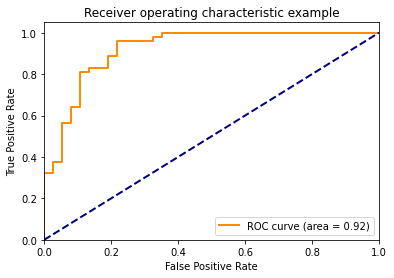

In [39]:
roc_auc_score(YTest, model.predict_proba(XTest).T[1])

roc(XTest, YTest, model)

# Explanation

In [44]:
import shap

shap.initjs()

In [45]:
explainer = shap.TreeExplainer(model)

In [46]:
shap_values = explainer.shap_values(XTrain)

In [47]:
shap.force_plot(explainer.expected_value, shap_values[0, :], XTrain.iloc[0, :])

In [48]:
shap.force_plot(explainer.expected_value, shap_values, features = XTrain)

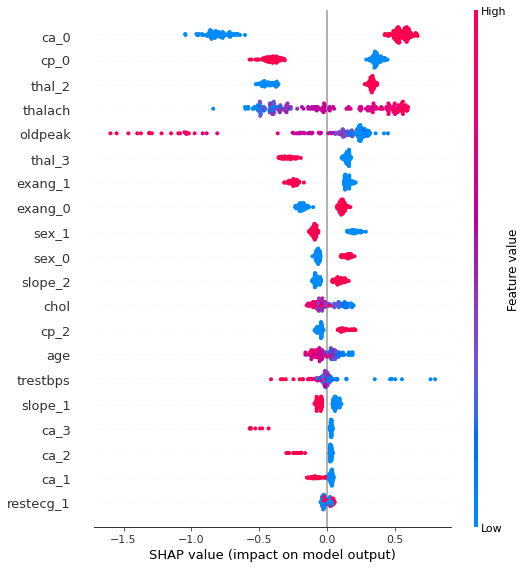

In [49]:
shap.summary_plot(shap_values, XTrain)

# Prediction

In [50]:
df_test = pd.read_csv("data/heart_test.csv")

df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,0,145,174,0,1,125,1,2.6,0,0,3
1,64,1,3,170,227,0,0,155,0,0.6,1,0,3
2,59,1,3,170,288,0,0,159,0,0.2,1,0,3
3,60,1,0,125,258,0,0,141,1,2.8,1,1,3
4,62,1,2,130,231,0,1,146,0,1.8,1,3,3
5,48,1,0,124,274,0,0,166,0,0.5,1,0,3
6,40,1,0,110,167,0,0,114,1,2.0,1,0,3
7,63,1,0,130,254,0,0,147,0,1.4,1,1,3
8,56,0,0,200,288,1,0,133,1,4.0,0,2,3
9,63,1,0,130,330,1,0,132,1,1.8,2,3,3


In [51]:
df_test_j = df_test.copy()

for feature_name in cat_features_:
    encoded = onehot(df_test_j[feature_name], feature_name)
    print(feature_name)
    df_test_j = df_test_j.join(encoded[0])

thal
exang
restecg
slope
cp
ca
sex


In [52]:
df_test_j.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'thal_3', 'thal_2',
       'exang_1', 'exang_0', 'restecg_1', 'restecg_0', 'slope_0', 'slope_1',
       'slope_2', 'cp_0', 'cp_3', 'cp_2', 'cp_1', 'ca_0', 'ca_1', 'ca_3',
       'ca_2', 'sex_1', 'sex_0'],
      dtype='object')

In [53]:
list(set(train_features) - set(df_test_j.columns))

['thal_0',
 'thal_1',
 'age_70',
 'restecg_2',
 'age_60',
 'ca_4',
 'age_40',
 'age_50']

In [54]:
for col in list(set(train_features) - set(df_test_j.columns)):
    df_test_j[col] = 0

In [55]:
df_test_j

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,sex_1,sex_0,thal_0,thal_1,age_70,restecg_2,age_60,ca_4,age_40,age_50
0,70,1,0,145,174,0,1,125,1,2.6,...,1,0,0,0,0,0,0,0,0,0
1,64,1,3,170,227,0,0,155,0,0.6,...,1,0,0,0,0,0,0,0,0,0
2,59,1,3,170,288,0,0,159,0,0.2,...,1,0,0,0,0,0,0,0,0,0
3,60,1,0,125,258,0,0,141,1,2.8,...,1,0,0,0,0,0,0,0,0,0
4,62,1,2,130,231,0,1,146,0,1.8,...,1,0,0,0,0,0,0,0,0,0
5,48,1,0,124,274,0,0,166,0,0.5,...,1,0,0,0,0,0,0,0,0,0
6,40,1,0,110,167,0,0,114,1,2.0,...,1,0,0,0,0,0,0,0,0,0
7,63,1,0,130,254,0,0,147,0,1.4,...,1,0,0,0,0,0,0,0,0,0
8,56,0,0,200,288,1,0,133,1,4.0,...,0,1,0,0,0,0,0,0,0,0
9,63,1,0,130,330,1,0,132,1,1.8,...,1,0,0,0,0,0,0,0,0,0


In [56]:
df_test_j['age_40'] = (df_test_j.age < 40).astype(int)
df_test_j['age_50'] = ((df_test_j.age >= 40) & (df_test_j.age < 50)).astype(int)
df_test_j['age_60'] = ((df_test_j.age >= 50) & (df_test_j.age < 60)).astype(int)
df_test_j['age_70'] = ((df_test_j.age >= 60) & (df_test_j.age < 70)).astype(int)


df_test_j

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,sex_1,sex_0,thal_0,thal_1,age_70,restecg_2,age_60,ca_4,age_40,age_50
0,70,1,0,145,174,0,1,125,1,2.6,...,1,0,0,0,0,0,0,0,0,0
1,64,1,3,170,227,0,0,155,0,0.6,...,1,0,0,0,1,0,0,0,0,0
2,59,1,3,170,288,0,0,159,0,0.2,...,1,0,0,0,0,0,1,0,0,0
3,60,1,0,125,258,0,0,141,1,2.8,...,1,0,0,0,1,0,0,0,0,0
4,62,1,2,130,231,0,1,146,0,1.8,...,1,0,0,0,1,0,0,0,0,0
5,48,1,0,124,274,0,0,166,0,0.5,...,1,0,0,0,0,0,0,0,0,1
6,40,1,0,110,167,0,0,114,1,2.0,...,1,0,0,0,0,0,0,0,0,1
7,63,1,0,130,254,0,0,147,0,1.4,...,1,0,0,0,1,0,0,0,0,0
8,56,0,0,200,288,1,0,133,1,4.0,...,0,1,0,0,0,0,1,0,0,0
9,63,1,0,130,330,1,0,132,1,1.8,...,1,0,0,0,1,0,0,0,0,0


In [57]:
result = model.predict_proba(df_test_j[train_features]).T[1]

In [58]:
result

array([0.09304491, 0.53897893, 0.62530313, 0.02472768, 0.15269335,
       0.58689182, 0.19725665, 0.14336342, 0.01919877, 0.04983725,
       0.47879454, 0.89871519, 0.04967836, 0.93141998, 0.90416498,
       0.80904103, 0.10905971, 0.78951576, 0.05597554, 0.79252968,
       0.8795943 , 0.309024  , 0.18913785, 0.20965228, 0.87005842,
       0.38741018, 0.18797154, 0.4098177 , 0.92537905, 0.65425511,
       0.59593253])

In [59]:
pd.Series(result).to_csv("data/out.csv")